# Haiku Detector

In [2]:
import nltk
from nltk.corpus import cmudict

nltk.download('punkt')
nltk.download('cmudict')

pron_dict = cmudict.dict()

def count_syllables(word):
    # fallback to approximation if word not in dict
    if word.lower() not in pron_dict:
        return syllable_count_fallback(word)
    else:
        return [len(list(y for y in x if y[-1].isdigit())) for x in pron_dict[word.lower()]][0]

def syllable_count_fallback(word):
    count = 0
    vowels = "aeiouy"
    word = word.lower()
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le"):
        count += 1
    if count == 0:
        count += 1
    return count

def is_haiku(text):
    lines = text.split('\n')
    if len(lines) != 3:
        return False

    for i, line in enumerate(lines):
        words = nltk.word_tokenize(line)
        syllables = 0
        for word in words:
            if word.isalpha():
                syllables += count_syllables(word)
        if i % 2 == 0 and syllables != 5:
            return False
        elif i == 1 and syllables != 7:
            return False
    return True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [11]:
# load json from machine_data_stories folder

import json
with open('../machine_data_stories/GPT4_temp0.6_haiku_nocrea110.json', 'r') as f:
    data_06 = json.load(f)
    data_06 = list(data_06.values())
    
with open('../machine_data_stories/GPT4_temp0.6_haiku_nocrea60.json', 'r') as f:
    data_062 = json.load(f)
    data_062 = list(data_062.values())
    
#combien data_06 and data_062
data_06 = data_06 + data_062

with open('../machine_data_stories/GPT4_temp0.8_haiku_nocrea110.json', 'r') as f:
    data_08 = json.load(f)
    data_08 = list(data_08.values())
    
with open('../machine_data_stories/GPT4_temp0.8_haiku_nocrea60.json', 'r') as f:
    data_082 = json.load(f)
    data_082 = list(data_082.values())

#combien data_08 and data_082
data_08 = data_08 + data_082

with open('../machine_data_stories/GPT4_temp1.0_haiku_nocrea100.json', 'r') as f:
    data_10 = json.load(f)
    data_10 = list(data_10.values())
    
with open('../machine_data_stories/GPT4_temp1.0_haiku_nocrea60.json', 'r') as f:
    data_102 = json.load(f)
    data_102 = list(data_102.values())
    
#combien data_10 and data_102
data_10 = data_10 + data_102
    
with open('../machine_data_stories/GPT4_temp1.2_haiku_nocrea130.json', 'r') as f:
    data_12 = json.load(f)
    data_12 = list(data_12.values())

with open('../machine_data_stories/GPT4_temp1.4_haiku_nocrea110.json', 'r') as f:
    data_14 = json.load(f)
    data_14 = list(data_14.values())
    
with open('../machine_data_stories/GPT4_temp1.4_haiku_nocrea60.json', 'r') as f:
    data_142 = json.load(f)
    data_142 = list(data_142.values())
    
#combien data_14 and data_142
data_14 = data_14 + data_142
    
with open('../machine_data_stories/GPT3_temp1.0_haiku_nocrea100.json', 'r') as f:
    data_GPT3 = json.load(f)
    data_GPT3 = list(data_GPT3.values())
    
with open('../machine_data_stories/GPT3_temp1.0_haiku_nocrea60.json', 'r') as f:
    data_GPT32 = json.load(f)
    data_GPT32 = list(data_GPT32.values())

#combien data_GPT3 and data_GPT32
data_GPT3 = data_GPT3 + data_GPT32
    
GPT4_haikus = {'0.6': data_06, '0.8': data_08, '1.0': data_10, '1.2': data_12, '1.4': data_14, 'GPT3': data_GPT3}

GPT4_haikus_proportion = {}
for key, value in GPT4_haikus.items():
    # check if haiku in all haiku_list are haiku
    haiku_count = 0
    for haiku in value:
        if is_haiku(haiku):
            haiku_count += 1
    # calculate proportion of haiku in haiku_list
    haiku_proportion = haiku_count / len(GPT4_haikus[key])
    haiku_proportion
    
    GPT4_haikus_proportion[key] = haiku_proportion
    
# select subsets of haikus that are haikus
GPT4_haikus_06 = [haiku for haiku in data_06 if is_haiku(haiku)]
GPT4_haikus_08 = [haiku for haiku in data_08 if is_haiku(haiku)]
GPT4_haikus_10 = [haiku for haiku in data_10 if is_haiku(haiku)]
GPT4_haikus_12 = [haiku for haiku in data_12 if is_haiku(haiku)]
GPT4_haikus_14 = [haiku for haiku in data_14 if is_haiku(haiku)]
GPT3_haikus = [haiku for haiku in data_GPT3 if is_haiku(haiku)]

# save haikus as json


In [12]:
#print leength of haikus
print('GPT4 0.6 haikus: ', len(GPT4_haikus_06))
print('GPT4 0.8 haikus: ', len(GPT4_haikus_08))
print('GPT4 1.0 haikus: ', len(GPT4_haikus_10))
print('GPT4 1.2 haikus: ', len(GPT4_haikus_12))
print('GPT4 1.4 haikus: ', len(GPT4_haikus_14))
print('GPT3 1.0 haikus: ', len(GPT3_haikus))


GPT4 0.6 haikus:  151
GPT4 0.8 haikus:  153
GPT4 1.0 haikus:  149
GPT4 1.2 haikus:  106
GPT4 1.4 haikus:  118
GPT3 1.0 haikus:  131


In [17]:
# save haikus as json
import json
with open('GPT4_temp0.6_haikus.json', 'w') as f:
    json.dump(GPT4_haikus_06[0:100], f)
    
with open('GPT4_temp0.8_haikus.json', 'w') as f:
    json.dump(GPT4_haikus_08[0:100], f)
    
with open('GPT4_temp1.0_haikus.json', 'w') as f:
    json.dump(GPT4_haikus_10[0:100], f)
    
with open('GPT4_temp1.2_haikus.json', 'w') as f:
    json.dump(GPT4_haikus_12[0:100], f)
    
with open('GPT4_temp1.4_haikus.json', 'w') as f:
    json.dump(GPT4_haikus_14[0:100], f)
    
with open('GPT3_temp1.0_haikus.json', 'w') as f:
    json.dump(GPT3_haikus[0:100], f)
    

Text(0.5, 0, 'Temperature')

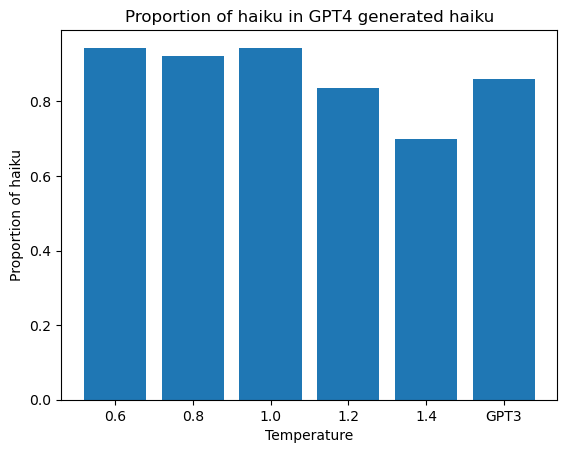

In [10]:
#plot haiku proportion
import matplotlib.pyplot as plt

plt.bar(range(len(GPT4_haikus_proportion)), list(GPT4_haikus_proportion.values()), align='center')

# add labels
plt.xticks(range(len(GPT4_haikus_proportion)), list(GPT4_haikus_proportion.keys()))

#add title
plt.title('Proportion of haiku in GPT4 generated haiku')

#add y label
plt.ylabel('Proportion of haiku')

#add x label
plt.xlabel('Temperature')